# Увеличение выручки интернет-магазина

 Отдел маркетинга подготовил список гипотез для увеличения выручки крупного интернет-магазина.

Цель проекта:
    
  - приоритизация гипотез
  - анализ результатов А/В теста

Для выполнения первой части в работе мы имеем файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами:
  - Reach 
  - Impact 
  - Confidence 
  - Effort

Для выполнения 2 части мы имеем результаты  A/B-теста, которые описаны в файлах
 - orders:
   - transactionId — идентификатор заказа
   - visitorId — идентификатор пользователя, совершившего заказ
   - date — дата, когда был совершён заказ
   - revenue — выручка заказа
   - group — группа A/B-теста, в которую попал заказ
 - visitors:
   - date — дата;
   - group — группа A/B-теста;
   - visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

План выполнения

1. [Приоритизация гипотез](#Prioritization)
2. [Анализ A/B-теста](#a_b_test)
3. [График кумулятивной выручки по группам](#cumul_revenue)
4. [График кумулятивного среднего чека по группам](#cumul_average_check)
5. [График относительного изменения кумулятивного среднего чека группы B к группе A](#cumul_change_average_check)
6. [График кумулятивной конверсии по группам](#cumul_conversion)
7. [График относительного изменения кумулятивной конверсии группы B к группе A](#cumul_change_conversion)
8. [Точечный график количества заказов по пользователям](#chart_count_orders)
9. [95-й и 99-й перцентили количества заказов на пользователя](#percentile_count_orders)
10. [Точечный график стоимостей заказов](#chart_cost_orders)
11. [95-й и 99-й перцентили стоимости заказов](#percentile_cost_orders)
12. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#stat_conversion)
13. [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#stat_average_check)
14. [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#stat_conversion_clean)
15. [Статистическуя значимость различий в среднем чеке заказа между группами по «очищенным» данным](#stat_average_check_clean)
16. [Вывод](#end)

## Приоритизация гипотез
<a id="Prioritization"></a>

Импортируем библиотеку pandas, scipy, numpy, math, matplotlib

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import math as mth
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 110)

Откроем и посмотрим общую информацию файла hypothesis

In [2]:
data = pd.read_csv('/datasets/.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE

Фреймворк ICE рассчитывается по формуле:

$$ ICE = \frac { IMPACT * CONFIDENCE } { EFFORTS } $$

In [4]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']

In [5]:
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Самыми перспективными гипотезами по ICE являются: 8, 0, 7, 6, 2 

### Применение фреймворка RICE

Фреймворк RICE рассчитывается по формуле:

$$ RICE = \frac { REACH * IMPACT * CONFIDENCE } { EFFORTS } $$

In [6]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']

In [7]:
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Самыми перспективными гипотезами по RICE являются: 7, 2, 0, 6, 8

In [8]:
data[['Hypothesis', 'RICE', 'ICE']].sort_values(by=['RICE', 'ICE'], ascending=False).style.background_gradient('coolwarm')

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000,1.000000


### Вывод

Номера перспективных гипотез при применении фреймворков ICE и RICE совпадают, но меняется их приоритизация. При фреймворке ICE лидеры - 8, 0. При фреймворке RICE лидеры - 7, 2. При применении фреймворка RICE появился новый(и важный) компонент "Reach". Он позволяет оценить скольких пользователей затронет изменение, которое рассматривается для внесения.

## Анализ A/B-теста
<a id="a_b_test"></a>

Откроем и посмотрим общую информацию файлов 'orders' и 'visitors'

In [9]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv') 

In [10]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Столбцы "date" в обоих датасетах имеет тип данных "object". Приведем к нужному типу.

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Найдем распределение пользователей по группам

In [13]:
orders.groupby('group')['visitorId'].nunique()

group
A    503
B    586
Name: visitorId, dtype: int64

In [14]:
visitors.groupby('group')['visitors'].nunique()

group
A    31
B    30
Name: visitors, dtype: int64

Распределение пользователей по группам неравномерно, особенно это касается файла 'orders'.

Переименуем столбцы файла 'orders'

In [15]:
orders = orders.rename(columns={'transactionId': 'orderId', 'visitorId': 'userId'})

Найдем количество дубликатов

In [16]:
visitors['visitors'].duplicated().sum()

4

In [17]:
orders['userId'].duplicated().sum()

166

In [18]:
orders['orderId'].duplicated().sum()

0

В обоих файлах в столбцах 'visitors', 'orders' найдены дубликаты. Для файла 'visitors'  дубликаты присутствуют в пользователях 'visitors' -  количество пользователей в указанную дату в указанной группе A/B-теста.  Согласно условию задачи, деление на группы происходит по номеру заказа, а не по пользователям. Поэтому удалим дубликаты из файла 'visitors'.

In [19]:
visitors = visitors.drop_duplicates(subset = 'visitors').reset_index(drop=True)

Проверим на пересечение заказов пользователей по группам.

In [20]:
ordersA = orders.query('group == "A"')
ordersB = orders.query('group == "B"')

In [21]:
id_a = ordersA['userId'].tolist()
id_b = ordersB['userId'].tolist()

In [22]:
dublicate = ordersB[ordersB['userId'].isin(ordersA['userId'])]

In [23]:
dublicate['userId'].nunique()

58

Такие пользователи обранужены, их 58. Их следует исключить для дальнейшего анализа.

In [24]:
usersId = dublicate['userId'].unique().tolist()

In [25]:
orders = orders.query('userId not in @usersId')

### График кумулятивной выручки по группам
<a id="cumul_revenue"></a>

Создадим массив уникальных пар значений дат и групп теста

In [26]:
datesGroups = orders[['date','group']].drop_duplicates()

In [27]:
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Получаем агрегированные кумулятивные по дням данные о заказах

In [28]:
ordersAggregated = datesGroups.apply(lambda x: 
                    orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 
                                           'userId' : pd.Series.nunique, 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])

In [29]:
ordersAggregated.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Получаем агрегированные кумулятивные по дням данные о посетителям

In [30]:
visitorsAggregated = datesGroups.apply(lambda x: 
                    visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

In [31]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединяем кумулятивные данные в одной таблице

In [32]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [33]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [34]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [36]:
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе В

In [37]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [38]:
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,59758,17
3,2019-08-02,221801,40
5,2019-08-03,288850,54
7,2019-08-04,385740,68
9,2019-08-05,475648,89


Строим график кумулятивной выручки по группам

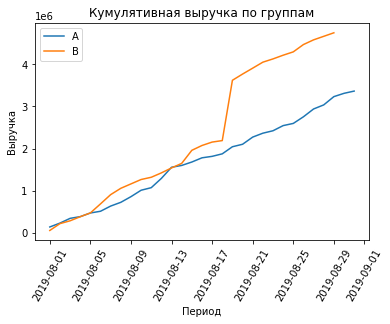

In [39]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Выручка практически равномерно растет по группам. Но после 17 августа в группе В видим резкий скачок, возможно были оплачены крупные заказы, либо было оплачено очень много заказов. Далее более плавный рост.

### График кумулятивного среднего чека по группам
<a id="cumul_average_check"></a>

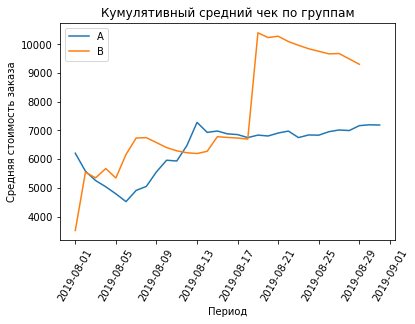

In [40]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Средняя стоимость заказа')
plt.legend()
plt.show()

Опять же наблюдаем резкий рост для среднего чека группы В после 17 августа. Вероятнее всего былт совершены крупные покупки. После можем наблюдать постепенный спад. Для выручки группы А было падение и сразу резкий рост в начале августа, после наблюдаем постепенное выравнивание. Отталкиваясь от увиденной картины на этом графике, средний чек для группы В выше среднего чека для группы А.

### График относительного изменения кумулятивного среднего чека группы B к группе A
<a id="cumul_change_average_check"></a>

Объединяем данные в одном датафрейме

In [41]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

Построим график

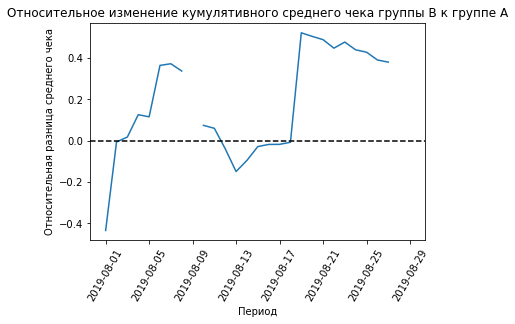

In [42]:
plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Относительная разница среднего чека')
plt.show()

На графике наблюдаем 'скачки', довольно большие. Если  рассматривать динамику после 17 августа, видим, что средний чек группы В превышает средний чек группы А.

### График кумулятивной конверсии по группам
<a id="cumul_conversion"></a>

Найдем кумулятивную конверсию

In [43]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Данные по группе A

In [44]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

Данные по группе В

In [45]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Построим график

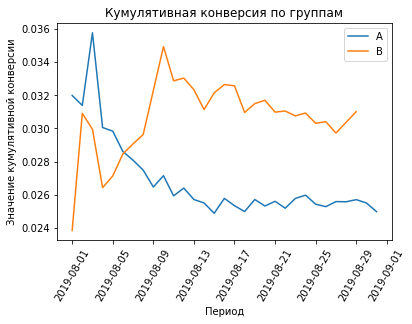

In [46]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Значение кумулятивной конверсии')
plt.show()

На графике видим, что в начале рассматриваемого периода у конверсии обеих групп был резкий рост. Далее наблюдаем падение коверсии у обеих групп, еще дальше рост конверсии группы В. Постепенно "скачки" конверсии в обеих группах немного уменьшились, но все еще мы продолжаем их наблюдать. При таких данных конверсия группы В на конец августа выглядет лучше.

### График относительного изменения кумулятивной конверсии группы B к группе A
<a id="cumul_change_conversion"></a>

Объединяем данные в одном датафрейме

In [47]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

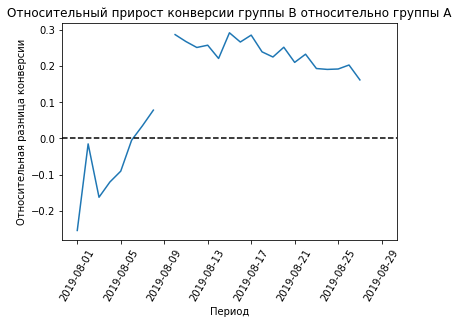

In [48]:
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=60)
plt.xlabel('Период')
plt.ylabel('Относительная разница конверсии')
plt.show()

В начале теста наблюдаем падение конверсии в группе B, затем видим большой рост, и далее следует падение. 

### Точечный график количества заказов по пользователям
<a id="chart_count_orders"></a>

Создадим датасет по количеству заказов по пользователям

In [49]:
ordersByUsers = (
    ordersAggregated.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

In [50]:
ordersByUsers.columns = ['user_id', 'orders']

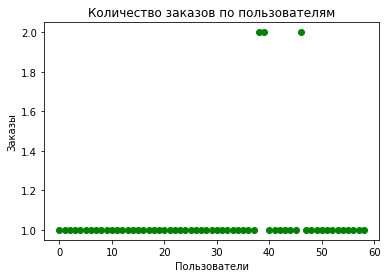

In [51]:
x_1_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_1_values, ordersByUsers['orders'], color = 'green')
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы');

Согласно полученному графику, наибольшее количество заказов по пользователям представлено в виде 1 заказа.

### 95-й и 99-й перцентили количества заказов на пользователя
<a id="percentile_count_orders"></a>

In [52]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1.1, 2. ])

Не более 5% пользователей совершали больше 1 заказов. Не более 1% пользователи совершали больше 2 заказов. За границу для определения аномальных пользователей принимаем пользователей, совершивших более 1 заказов.

### Точечный график стоимостей заказов
<a id="chart_cost_orders"></a>

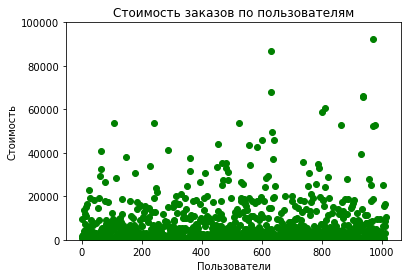

In [53]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color = 'green')
plt.ylim([0, 100000])
plt.title('Стоимость заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость');

Согласно полученному графику, большинство заказов сосредоточено в диапазоне 0-10000 у.е. В другом ценновом диапазоне заказов меньше, их количество уменьшается с ростом стоимости.

### 95-й и 99-й перцентили стоимости заказов
<a id="percentile_cost_orders"></a>

In [54]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Заказы стоимостью более 26785 у.е совершали не более 5% пользователей. Заказы стоимостью более 54000 у.е совершали не более 1% пользователей. За границу для определения аномальных пользователей принимаем пользователей, совершивших совершивших заказ стоимостью более 26785 у.е.

### Статистическая значимость различий в конверсии между группами по «сырым» данным.
<a id="stat_conversion"></a>

Найдем количество пользователей в указанную дату по группам

In [55]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]

In [56]:
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

Найдем кумулятивное количество пользователей в указанную дату по группам

In [57]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

In [58]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)

In [59]:
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Найдем количество заказов и выручку по ним в указанную по группам

In [60]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)

In [61]:
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [62]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)

In [63]:
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

Найдем кумулятивное количество заказов и кумулятивную выручку по ним в указанную дату по группам

In [64]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])

In [65]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])

In [66]:
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим все датасеты

In [67]:
df = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

In [68]:
df.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713.0,719,713.0
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581.0,1338,1294.0
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509.0,1845,1803.0
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770.0,2562,2573.0
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707.0,3318,3280.0


Найдем количество совершённых заказов для пользователей по группам

In [69]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('userId', as_index=False).agg({'orderId': pd.Series.nunique}))

In [70]:
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('userId', as_index=False).agg({'orderId': pd.Series.nunique}))

In [71]:
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [72]:
sampleA = pd.concat([ordersByUsersA['orders'],
    pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [73]:
sampleB = pd.concat([ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Посчитаем статистическую значимость различий в конверсии между группами

Сформируем гипотезы:
   - Н0 - статистически значимых различий в конверсии по "сырым " данным между группами нет
   - Н1 - статистически значимые различия в конверсии по "сырым " данным между группами есть

In [74]:
'{0:.6f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1])

'0.000002'

P_value значиельно меньше 0.05, поэтому мы отвергаем нулевую гипотезу. По «сырым» данным в конверсии групп A и B присутствуют статистически значимые различия. 

Найдем относительное различие конверсии группы B

In [75]:
"{0:.3%}".format(sampleB.mean() / sampleA.mean() - 1)

'33.415%'

Относительный прирост конверсии группы В к группе А составляет 33%

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
<a id="stat_average_check"></a>

Сформируем гипотезы:

  - Н0 - статистически значимых различий в среднем чеке заказа по "сырым " данным между группами нет
  - Н1 - статистически значимые различия в среднем чеке заказа по "сырым " данным между группами есть

In [76]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                                    alternative='two-sided')[1])

'0.829'

P_value больше 0.05, статистически значимых различий в среднем чеке между группами А и В нет.

In [77]:
'{0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'28.660%'

Относительное различие между средним чеком группы В к группе А составляет 28,8%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным
<a id="stat_conversion_clean"></a>

Ранее в п. 2.7, 2.9  было указано, что за аномальных пользователей принимаем тех, кто совершил более 1 заказов или совершил заказ дороже 28 000 у.е. Сделаем срезы пользователей с этими параметрами. 

In [78]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['userId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values())

In [79]:
abnormalUsers.head()

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: userId, dtype: int64

Найдем очищенные данные по группам

In [80]:
sampleAFiltered = pd.concat(
    [ ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(df['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0)
sampleBFiltered = pd.concat(
    [ordersByUsersB[ np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0, index=np.arange(df['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0) 

Сформируем гипотезы:

  - Н0 - статистически значимых различий в конверсии по "очищенным" данным между группами нет
  - Н1 - статистически значимые различия в конверсии по "очищенным" данным между группами есть

In [81]:
'{0:.6f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1])

'0.000006'

И по «очищенным» данным P_value меньше 0.05, мы отвергаем нулевую гипотезу. Статистически значимые различия в конверсии между группами A и B есть.

In [82]:
'{0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'35.091%'

Относительный прирост конверсии группы В к группе А составляет 35,9% по по «очищенным» данным.

### Статистическуя значимость различий в среднем чеке заказа между группами по «очищенным» данным
<a id="stat_average_check_clean"></a>

Сформируем гипотезы:

  - Н0 - статистически значимых различий в среднем чеке заказа по "очищенным" данным между группами нет
  - Н1 - статистически значимые различия в среднем чеке заказа по "очищенным" данным между группами есть

In [83]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1])

'0.727'

P_value больше 0.05, статистически значимых различий в среднем чеке между группами А и В нет и для «очищенных» данных.

In [84]:
'{0:.3%}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['userId'].isin(abnormalUsers)))
                       ]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',
                        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'-3.373%'

Но относительное различие в среднем чеке  группы В к группе А изменилось, по «очищенным» данным средний чек группы В уступает среднему чеку группы А на 3%.

## Вывод
<a id="end"></a>

Проведя анализ А/В-теста, мы получили следующие результаты:
1. Для "сырых данных":
  - в конверсии групп A и B статистически значимых различия есть 
  - в среднем чеке между группами А и В статистически значимых различий нет
2. Для "очищенных данных":
  - в конверсии групп A и B статистически значимые различия есть 
  - в среднем чеке между группами А и В статистически значимых различий нет

При оценке:
   - кумулятивной выручки, 
   - кумулятивного среднего чека, 
   - относительного изменения кумулятивного среднего чека группы B к группе A, 
   - кумулятивной конверсии, 
   - относительного изменения кумулятивной конверсии группы B к группе A 

результаты группы В всегда были выше, т. е. лучше.

Подводя итог, тест следует остановить и зафиксировать победу группы В.